In [1]:
from field_kit import FourierAnalysis, GaussianRandomField, plaw_with_cutoffs
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters for the Gaussian random fields
l_min1 = 10.0 # minimum or "dissipation" scale
l_min2 = 30.0 # minimum or "dissipation" scale
l_max = 200.0 # maximum or "injection" scale
alpha = -11.0 / 3.0
f_rms = 10.0  # normalization of the field

In [3]:
# Make two power spectra with different l_min values
power_spec1 = plaw_with_cutoffs(l_min1, l_max, alpha)
power_spec2 = plaw_with_cutoffs(l_min2, l_max, alpha)

In [4]:
# Renormalize the power spectra to have the desired RMS value
power_spec1.renormalize(f_rms)
power_spec2.renormalize(f_rms)

In [5]:
# Parameters for the box and grid
le = np.array([0.0, 0.0, 0.0])
re = np.array([750.0, 750.0, 750.0])
ddims = [256] * 3
width = re - le

In [6]:
# This makes a Gaussian random field with the specified power spectrum
g1 = GaussianRandomField(le, re, ddims, power_spec1, seed=10)
v1 = g1.generate_scalar_field_realization()

# Make another field with a different dissipation scale
g2 = GaussianRandomField(le, re, ddims, power_spec2, seed=10)
v2 = g2.generate_scalar_field_realization()

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


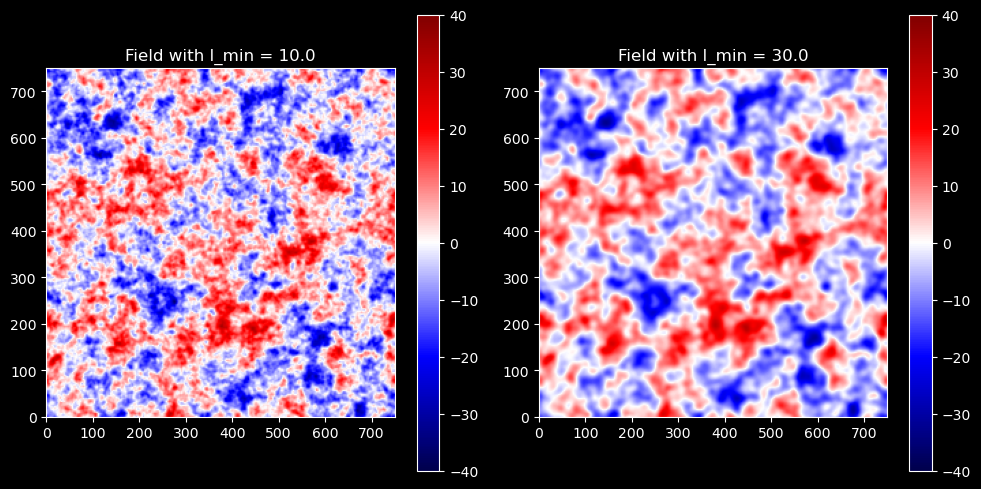

In [7]:
# Plot the slices of the two fields to see the difference
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
extent = (le[0], re[0], le[1], re[1])
im1 = ax[0].imshow(
    v1[:, :, ddims[2] // 2],
    origin="lower",
    extent=extent,
    cmap="seismic",
    vmin=-40.0,
    vmax=40.0,
)
ax[0].set_title(f"Field with l_min = {l_min1}")
fig.colorbar(im1, ax=ax[0])
im2 = ax[1].imshow(
    v2[:, :, ddims[2] // 2],
    origin="lower",
    extent=extent,
    cmap="seismic",
    vmin=-40.0,
    vmax=40.0,
)
ax[1].set_title(f"Field with l_min = {l_min2}")
fig.colorbar(im2, ax=ax[1])
plt.tight_layout()
plt.show()

In [8]:
# This is a class I wrote to simplify stuff
fa = FourierAnalysis(width, ddims)

In [9]:
# Get the power spectrum of each spatial component
nbins = 60  # Number of bins for the power spectrum, it will
# use the min-max wavenumbers as boundaries
k1, Pk1 = fa.make_powerspec(v1, nbins)
k2, Pk2 = fa.make_powerspec(v2, nbins)

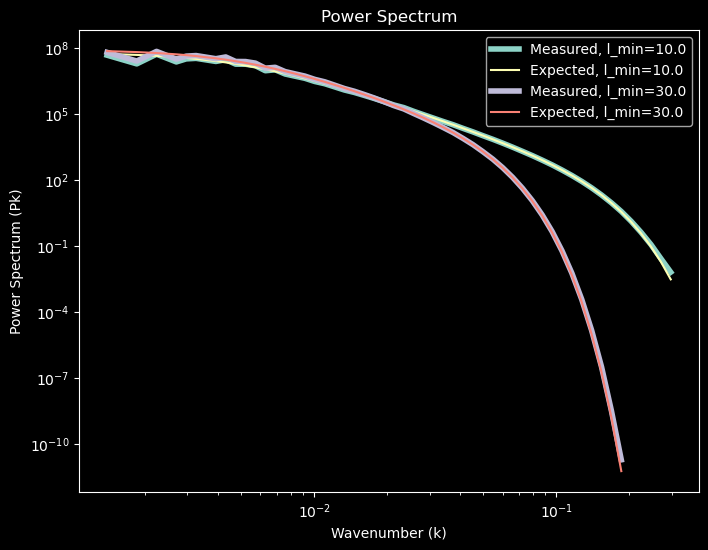

In [10]:
# Now let's plot both the expected and computed power spectra
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.loglog(k1, Pk1, label=f"Measured, l_min={l_min1}", lw=4)
ax.loglog(
    k1, power_spec1(k1), label=f"Expected, l_min={l_min1}"
)
ax.loglog(k2, Pk2, label=f"Measured, l_min={l_min2}", lw=4)
ax.loglog(
    k2, power_spec2(k2), label=f"Expected, l_min={l_min2}"
)
ax.set_xlabel("Wavenumber (k)")
ax.set_ylabel("Power Spectrum (Pk)")
ax.set_title("Power Spectrum")
ax.legend()